<h1><center><strong>Brain🧠 Tumor Detection</strong></center></h1>


<hr>

<h2><font color='green'>Overview..</font></h2>

* A brain tumor is a mass or growth of **abnormal cells** in your brain.

* Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant). Brain tumors can begin in your brain (primary brain tumors), or cancer can begin in other parts of your body and spread to your brain (secondary, or metastatic, brain tumors).

* How quickly a brain tumor grows can vary greatly. The **growth rate** as well as **location of a brain tumor** determines how it will **affect the function of your nervous system**.

* Brain tumor treatment options depend on the type of brain tumor you have, as well as its size and location.


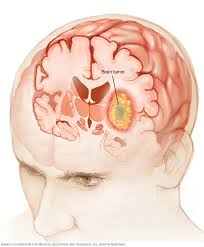



<h2><font color='Green'>Symptoms...</font></h2>

The signs and symptoms of a **brain tumor vary greatly and depend on the brain tumor's size, location and rate of growth**.

General signs and symptoms caused by brain tumors may include --

* New onset or change in pattern of headaches
* Headaches that gradually become more frequent and more severe
* Unexplained nausea or vomiting
* Vision problems, such as blurred vision, double vision or loss of peripheral vision
* Gradual loss of sensation or movement in an arm or a leg
* Difficulty with balance
* Speech difficulties
* Confusion in everyday matters
* Personality or behavior changes
* Seizures, especially in someone who doesn't have a history of seizures
* Hearing problems

<hr>

#### Part 1.
<h3><font color='light-Blue'>Image Data Analysis and Classification</font></h3>
The main purpose of this project was to build a CNN model that would classify if subject has a tumor or not base on MRI scan. I used the VGG-16 model architecture and weights to train the model for this binary problem. I used `accuracy` as a metric to justify the model.

<img src="https://tajwarabraraleef.github.io/img/headers/brain.PNG" width="600">
<br><br>


<h3><font color='light-Blue'>Data Set Description </font></h3>

The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:
* `NO` - no tumor, encoded as `0` 
* `YES` - tumor, encoded as `1`


### Table of Contents
* <p style="color: blue">Image Data Loading </p>
* <p style="color: blue">Visualizing with Colormaps</p>
* <p style="color: blue">Equalized Hist Technique and K-Means clustring</p>
* <p style="color: blue">Edge detection</p>
* <p style="color: blue">Model traning (VGG-16)</p>
* <p style="color: blue">Tesing model performance</p>
* <p style="color: blue">Evaluation</p>

## Image Data Loading

In [315]:
import os
import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import cv2

import numpy as np
import pandas as pd
from random import sample

from sklearn.cluster import KMeans

In [316]:
def load_img(path, resize=None):
    img= cv2.imread(path, 0)
    if resize:
        img= cv2.resize(img, resize)    
    return img

In [317]:
dir_path= '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'
tumor_set=[]
non_tumor_set=[]

for label in os.listdir(dir_path):
    if label=='yes':
        path= os.path.join(dir_path, label)
        for img_path in tqdm(sample(glob.glob(path + '/*'), 30)):
            tumor_set.append(load_img(img_path))
    else:
        path= os.path.join(dir_path, label)
        for img_path in tqdm(sample(glob.glob(path + '/*'), 30)):
            non_tumor_set.append(load_img(img_path))

##  Visualizing with Colormaps

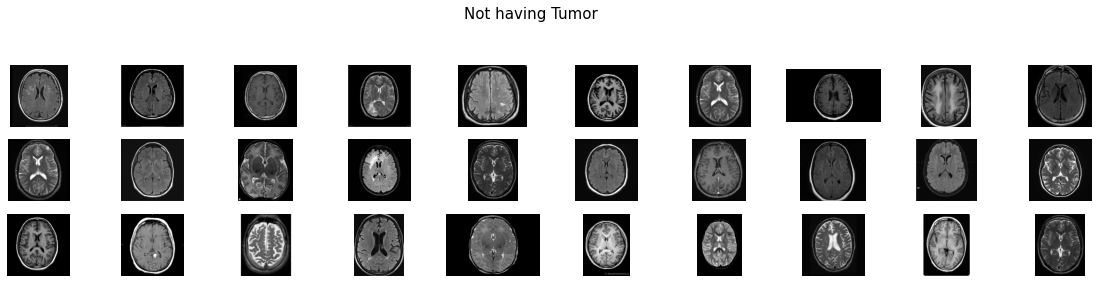

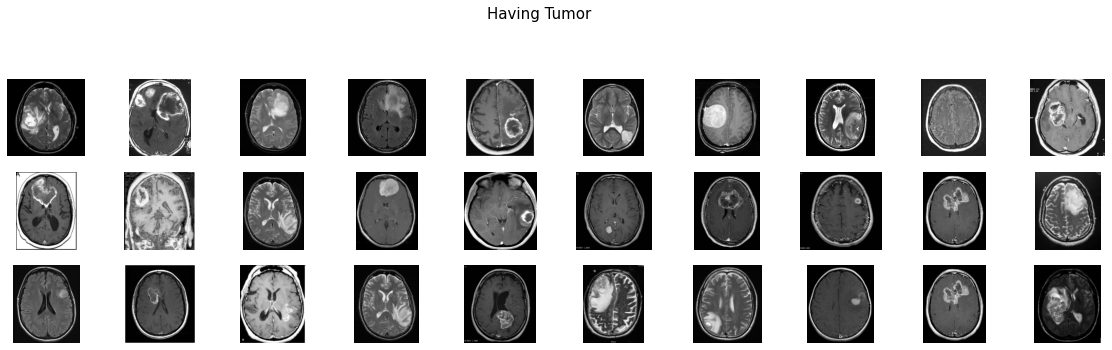

In [318]:
plt.figure(figsize=(20,8))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(non_tumor_set[i], 'gray')
    plt.axis('off')
    c+=1    
plt.suptitle('Not having Tumor', size=15)
plt.show()


plt.figure(figsize=(20,10))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(tumor_set[i], 'gray')
    plt.axis('off')
    c+=1  
plt.suptitle('Having Tumor', size=15)
plt.show()

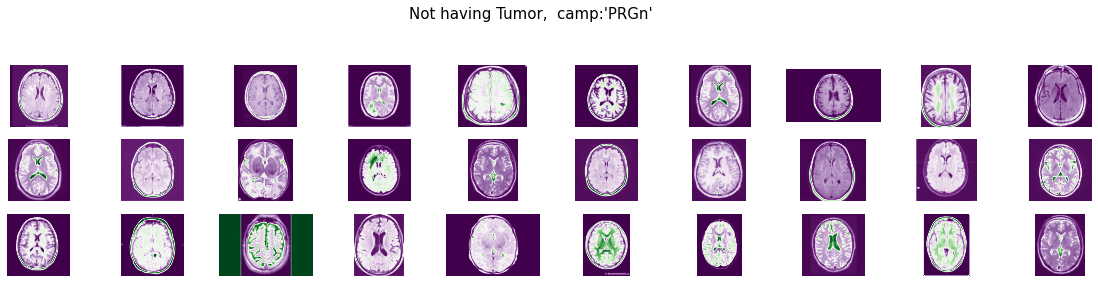

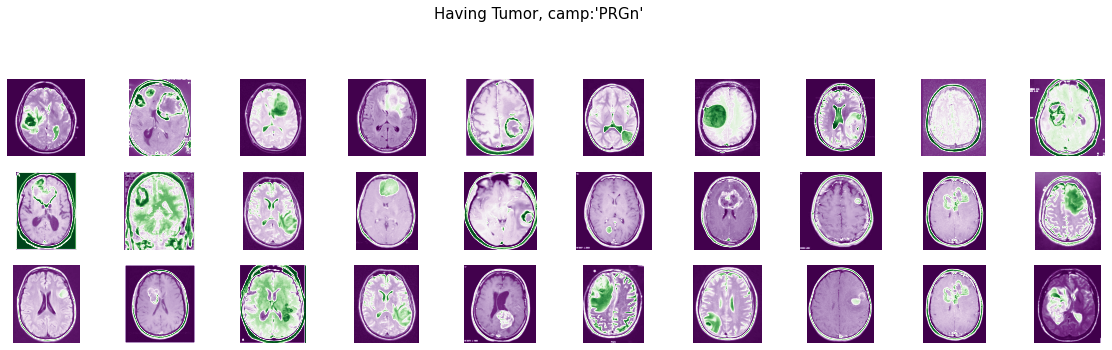

In [319]:

plt.figure(figsize=(20,8))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(non_tumor_set[i], 'PRGn')
    plt.axis('off')
    c+=1    
plt.suptitle("Not having Tumor,  camp:'PRGn'", size=15)
plt.show()


plt.figure(figsize=(20,10))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(tumor_set[i], 'PRGn')
    plt.axis('off')
    c+=1  
plt.suptitle("Having Tumor, camp:'PRGn'", size=15)
plt.show()

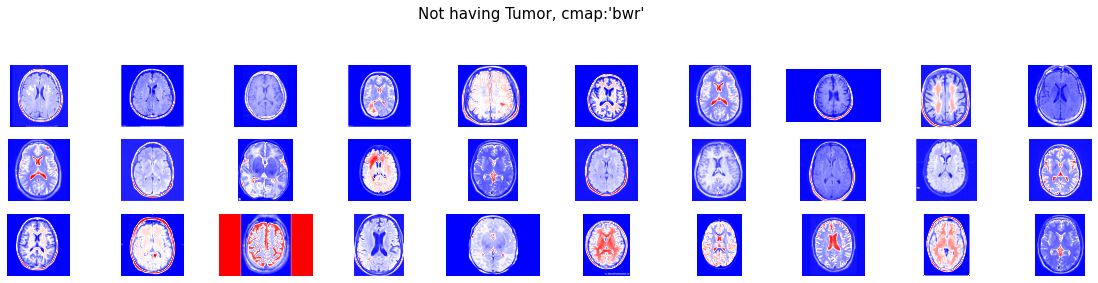

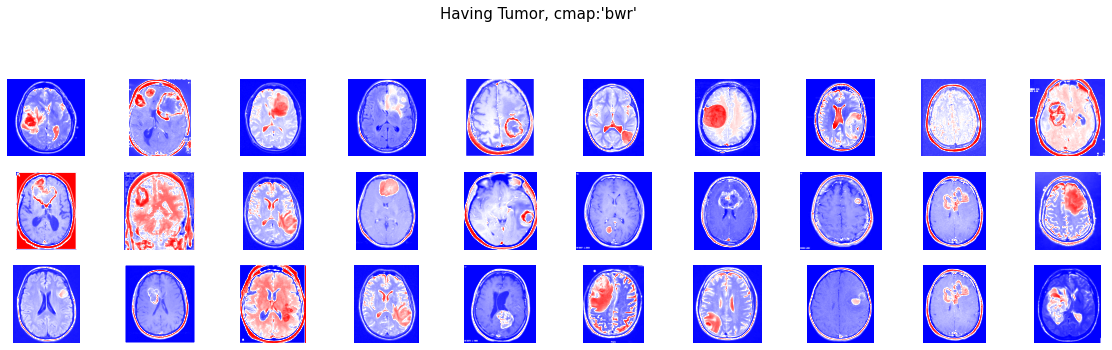

In [320]:
plt.figure(figsize=(20,8))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(non_tumor_set[i], 'bwr')
    plt.axis('off')
    c+=1    
plt.suptitle("Not having Tumor, cmap:'bwr'", size=15)
plt.show()


plt.figure(figsize=(20,10))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(tumor_set[i], 'bwr')
    plt.axis('off')
    c+=1  
plt.suptitle("Having Tumor, cmap:'bwr'", size=15)
plt.show()

## Equalized Hist Technique and K-Means clustring

In [321]:
def adaptive_hist(img, clipLimit= 4.0):
    window= cv2.createCLAHE(clipLimit= clipLimit, tileGridSize=(8, 8))
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

    ch1, ch2, ch3 = cv2.split(img_lab)
    img_l = window.apply(ch1)
    img_clahe = cv2.merge((img_l, ch2, ch3))
    return cv2.cvtColor(img_clahe, cv2.COLOR_Lab2BGR)

In [322]:
def k_means(img, n_colors= 2):
    w, h, d = original_shape = tuple(img.shape)
    img= img/255.0
    image_array = np.reshape(img, (w * h, d))
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)
    labels = kmeans.predict(image_array)
    
    """Recreate the (compressed) image from the code book & labels"""
    codebook= kmeans.cluster_centers_
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

Text(0.5, 0.98, 'Normal Brain MRI scan')

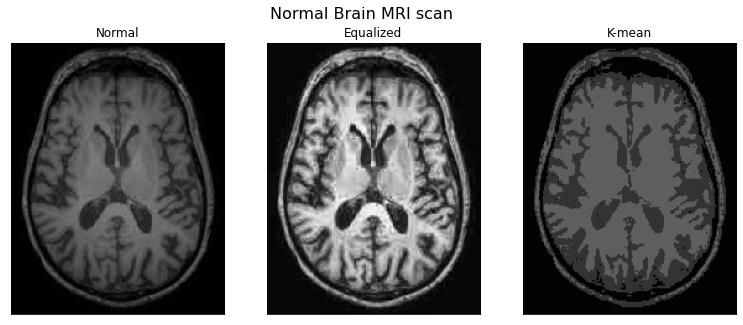

In [323]:
img_path= '../input/brain-mri-images-for-brain-tumor-detection/no/10 no.jpg'

f, ax= plt.subplots(1, 3, figsize=(13,5))
img= cv2.imread(img_path)
eq_hist_img= adaptive_hist(img)
kmeans_img= k_means(img, 3)

ax[0].imshow(img, aspect='auto')
ax[0].set_xticks([]); ax[0].set_yticks([]); ax[0].set_title('Normal')
ax[1].imshow(eq_hist_img,  aspect='auto')
ax[1].set_xticks([]); ax[1].set_yticks([]); ax[1].set_title('Equalized')
ax[2].imshow(kmeans_img,  aspect='auto')
ax[2].set_xticks([]); ax[2].set_yticks([]); ax[2].set_title('K-mean')

plt.suptitle('Normal Brain MRI scan', size=16)

Text(0.5, 0.98, 'Tumor Brain MRI scan')

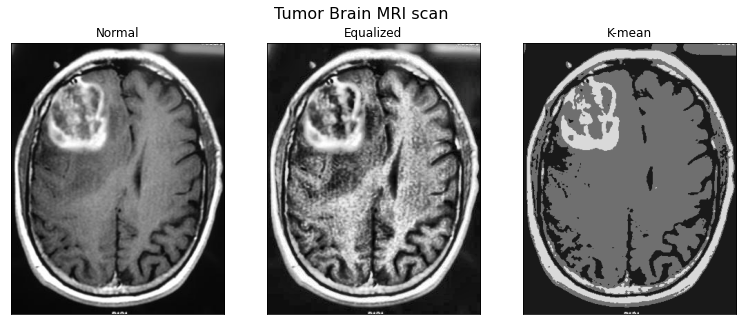

In [324]:
img_path= '../input/brain-mri-images-for-brain-tumor-detection/yes/Y15.jpg'

f, ax= plt.subplots(1, 3, figsize=(13,5))
img= cv2.imread(img_path)
eq_hist_img= adaptive_hist(img)
kmeans_img= k_means(img, 3)

ax[0].imshow(img, aspect='auto')
ax[0].set_xticks([]); ax[0].set_yticks([]); ax[0].set_title('Normal')
ax[1].imshow(eq_hist_img,  aspect='auto')
ax[1].set_xticks([]); ax[1].set_yticks([]); ax[1].set_title('Equalized')
ax[2].imshow(kmeans_img,  aspect='auto')
ax[2].set_xticks([]); ax[2].set_yticks([]); ax[2].set_title('K-mean')

plt.suptitle('Unhealthy Brain(Tumor) MRI scan', size=16)

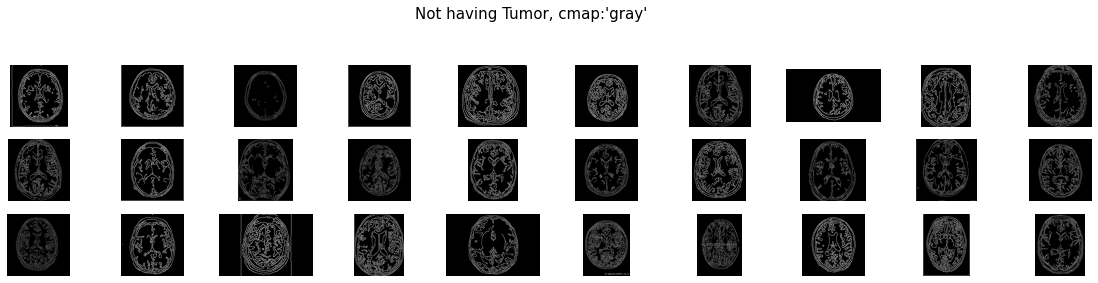

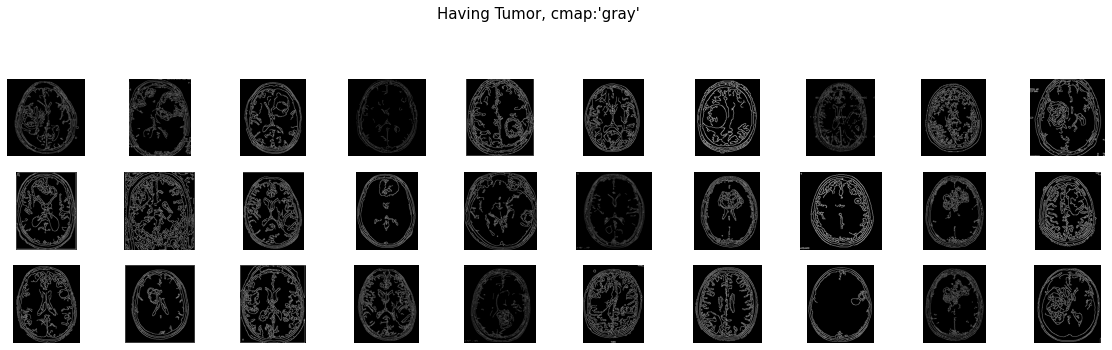

In [325]:
plt.figure(figsize=(20,8))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    ed= cv2.medianBlur(non_tumor_set[i], 5)
    ed= cv2.Canny(ed,100,20)
    plt.imshow(ed, 'gray')
    plt.axis('off')
    c+=1    
plt.suptitle("Not having Tumor, cmap:'gray'", size=15)
plt.show()


plt.figure(figsize=(20,10))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    ed= cv2.medianBlur(tumor_set[i], 5)
    ed= cv2.Canny(ed,100,20)
    plt.imshow(ed, 'gray')
    plt.axis('off')
    c+=1  
plt.suptitle("Having Tumor, cmap:'gray'", size=15)
plt.show()

## Model traning

In [287]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [59]:
train_datagen = ImageDataGenerator(rescale=1./255,
    width_shift_range=0.05,
    rotation_range=12, 
    shear_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    validation_split=0.1225) # set validation split

In [61]:
train_data_dir= '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=26,
    class_mode='binary',
    subset='training') # set as training data

test_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(224, 224),
    batch_size= 30,
    class_mode='binary',
    subset='validation') # set as validation data

Found 223 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [62]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [237]:
def build_model():
    vgg= VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    vgg.layers
    for layer in vgg.layers:
        layer.trainable= False
    x= layers.Flatten()(vgg.output)
    x= layers.Dropout(0.25)(x)
    x= layers.Dense(1024, activation='relu')(x)
    x= layers.Dropout(0.15)(x)
    out= layers.Dense(1, activation='sigmoid')(x)
    
    return Model(inputs= vgg.input, outputs=out)

In [238]:
model= build_model()
model.compile(loss= tensorflow.keras.losses.BinaryCrossentropy(),
              optimizer=tensorflow.keras.optimizers.Adam(0.0002), metrics=['accuracy'])

In [239]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     mode='min', verbose=1, patience=4)

check= tensorflow.keras.callbacks.ModelCheckpoint(
    './model22_wg.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='min', save_freq='epoch')

In [240]:
his= model.fit_generator(train_generator,
                        steps_per_epoch= train_generator.samples // 26,
                        validation_data=test_generator,
                        validation_steps = 1.0,
                        epochs=100, callbacks=[check, early_stop])

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.3185 - accuracy: 0.6396
Epoch 00001: val_loss improved from inf to 0.85992, saving model to ./model22_wg.h5
8/8 [==============================] - 5s 580ms/step - loss: 1.3185 - accuracy: 0.6396 - val_loss: 0.8599 - val_accuracy: 0.6667
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.6219 - accuracy: 0.7310
Epoch 00002: val_loss improved from 0.85992 to 0.49779, saving model to ./model22_wg.h5
8/8 [==============================] - 4s 475ms/step - loss: 0.6219 - accuracy: 0.7310 - val_loss: 0.4978 - val_accuracy: 0.7667
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.8125
Epoch 00003: val_loss did not improve from 0.49779
8/8 [==============================] - 4s 464ms/step - loss: 0.4211 - accuracy: 0.8125 - val_loss: 0.6443 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.4284 - accuracy: 0.8325
Epoch 00004: val_l

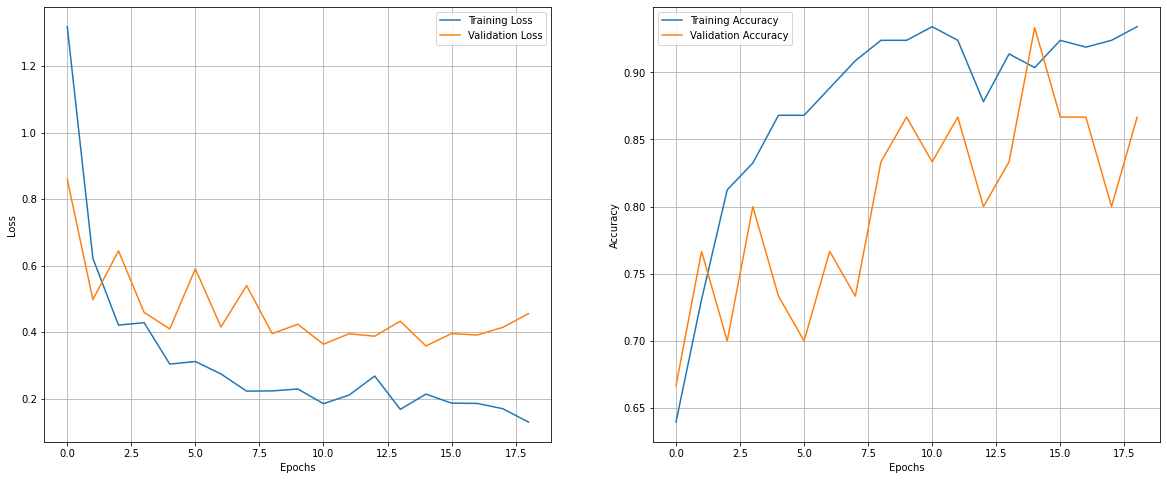

In [241]:
plt.figure(1, figsize = (20, 8))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( his.history["loss"], label = "Training Loss")
plt.plot( his.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( his.history["accuracy"], label = "Training Accuracy")
plt.plot( his.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

## Tesing model performance

In [297]:
imgs, labels = next(test_generator)

In [298]:
model= model.load_weights('/tumor_diagnosis.h5')

y_pred= model.predict(imgs)
y_pred= np.float32(y_pred>0.5)

print(confusion_matrix(labels,y_pred))
print('---------------------------')
print(classification_report(labels,y_pred))
print('---------------------------')
print(accuracy_score(labels,y_pred))

[[ 9  3]
 [ 0 18]]
---------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        12
         1.0       0.86      1.00      0.92        18

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30

---------------------------
0.9


## Evaluation

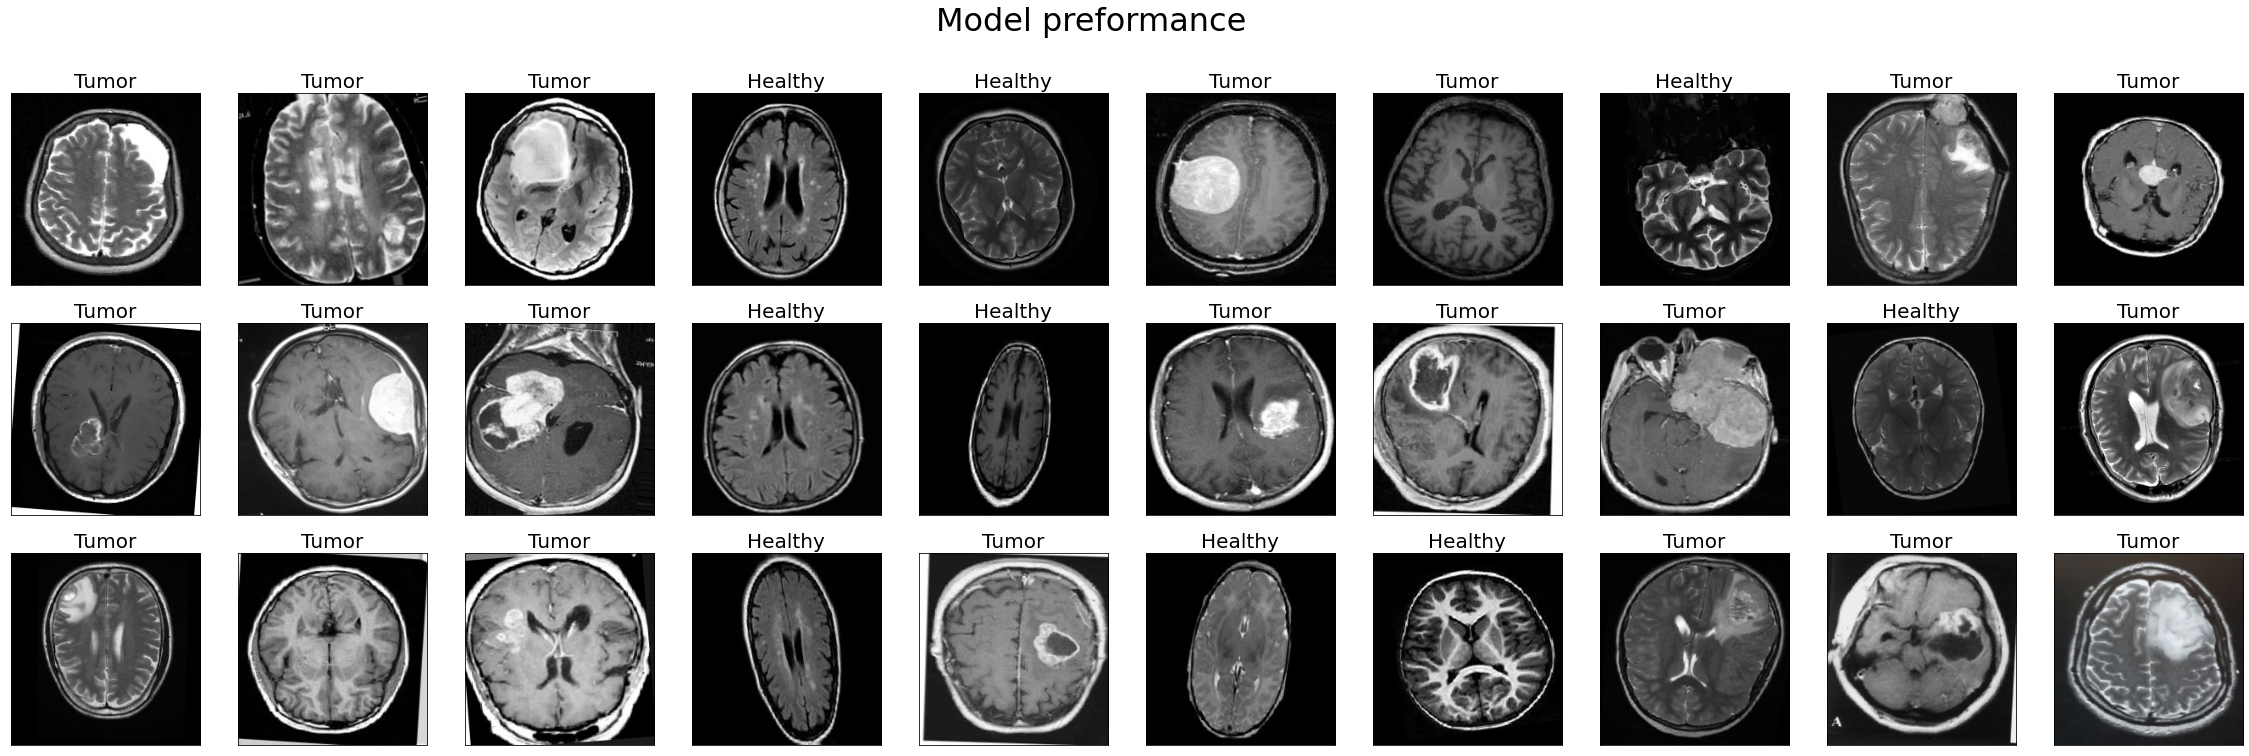

In [314]:
f, ax= plt.subplots(3, 10, figsize=(40, 12))
grd_truth= {0:'Healthy', 1:'Tumor'}
for i in tqdm(range(30)):
    ax[i//10][i%10].imshow(imgs[i], aspect='auto')
    ax[i//10][i%10].set_xticks([]); ax[i//10][i%10].set_yticks([]); 
    
    pred= int(model.predict(np.expand_dims(imgs[i], 0))>0.5)
    ax[i//10][i%10].set_title(grd_truth[pred], size=20)
    
plt.suptitle('Model preformance', size=32)    
plt.show()